In [1]:
import pandas as pd

dataPath = '~/SageMaker/kskc2180033/data/202011160449_cds_01_total/part-00000-5fa4e30f-f70e-4db4-a52d-06a34957783f-c000.csv'
df = pd.read_csv(dataPath, index_col=0, parse_dates=True)
df[0:10]

,flag,Y,material_type,product_type,shift,start_time,end_time,thick,width,length,...,P1,Q1,R1,S1,S2,T1,U1,V1,W1,X1
idx,,,,,,,,,,,,,,,,,,,,,
2447,train,195.1609,B,C,A,2020-01-06 10:14:00,2020-01-06 10:57:00,29.5,568.5,2103.5,...,14.625,88.175,68.110,65.020,53.585,53.215,46.995,59.236667,110.532297,9.136789
333,train,181.4409,A,C,B,2019-04-17 16:47:00,2019-04-17 17:34:00,41.0,793.5,1178.5,...,14.525,103.350,68.375,60.675,58.435,63.225,68.915,57.436667,103.981950,8.857715
2066,train,203.6329,A,D,B,2019-11-16 06:30:00,2019-11-16 07:13:00,41.0,563.5,2088.5,...,14.405,103.100,68.335,64.810,49.395,63.305,43.520,63.736667,114.400205,9.021108
939,test,NaN,A,D,A,2020-10-03 16:17:00,2020-10-03 16:59:00,41.5,793.5,2088.5,...,14.235,103.580,68.335,63.000,59.650,63.295,45.920,58.696667,106.701176,8.915066
3529,train,186.8689,A,D,B,2020-05-07 08:08:00,2020-05-07 08:50:00,41.0,563.5,2088.5,...,14.340,88.450,68.245,65.330,51.385,63.160,58.385,60.496667,109.104573,8.892539
448,test,NaN,A,D,C,2020-07-26 15:43:00,2020-07-26 16:25:00,41.5,563.5,2088.5,...,16.395,88.250,68.110,65.395,51.555,63.255,58.430,61.036667,114.626929,9.113712
1617,train,179.5600,A,C,B,2019-10-03 13:34:00,2019-10-03 14:13:00,41.0,643.5,2088.5,...,14.470,103.755,68.440,64.855,57.600,63.210,63.505,58.066667,107.473662,8.829203
78,test,NaN,A,C,A,2020-06-23 16:15:00,2020-06-23 16:50:00,41.5,793.5,1388.5,...,15.525,103.350,68.445,65.130,63.145,63.420,58.345,62.836667,111.909736,9.243735
736,train,181.4409,A,C,C,2019-06-20 15:42:00,2019-06-20 16:30:00,41.5,793.5,1178.5,...,14.770,103.300,68.230,62.680,57.580,63.555,69.825,56.896667,103.073576,8.814864


In [2]:
# shift feature는 같은 항목이 연달아 나오는 경향성이 있으므로 
# 하단에 NA값 처리 시 ffill().bfill()을 사용할 수 있도록 'start_time' 기준으로 정렬해줌

df = df.sort_values(['start_time'])
df

,flag,Y,material_type,product_type,shift,start_time,end_time,thick,width,length,...,P1,Q1,R1,S1,S2,T1,U1,V1,W1,X1
idx,,,,,,,,,,,,,,,,,,,,,
1,train,184.96,A,D,D,2019-02-15 10:35:00,2019-02-15 11:18:00,41.0,563.5,2088.5,...,14.035,88.580,68.245,62.730,42.695,63.420,109.335,58.066667,105.391685,8.868492
2,train,184.96,A,D,D,2019-02-15 11:18:00,2019-02-15 12:01:00,41.0,563.5,2088.5,...,14.045,88.430,68.510,62.925,42.860,63.145,109.755,58.066667,105.511868,8.847720
3,train,184.96,A,D,D,2019-02-15 12:01:00,2019-02-15 12:43:00,41.0,563.5,2088.5,...,14.010,88.100,68.160,62.770,43.090,63.265,109.970,58.066667,105.488896,8.883399
4,train,184.96,A,D,D,2019-02-15 12:43:00,2019-02-15 13:25:00,41.0,563.5,2088.5,...,14.050,88.485,68.275,62.860,43.275,63.160,109.270,58.066667,105.589947,8.878033
5,train,184.96,A,D,D,2019-02-15 13:25:00,2019-02-15 14:07:00,41.0,563.5,2088.5,...,14.030,88.405,68.310,62.985,43.680,63.230,109.380,58.066667,105.658513,8.873243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,test,NaN,B,C,D,2020-10-05 09:33:00,2020-10-05 10:15:00,28.5,793.5,2103.5,...,14.185,103.175,68.205,63.265,63.855,63.305,46.175,56.266667,101.604222,8.892133
997,test,NaN,B,C,D,2020-10-05 10:15:00,2020-10-05 10:57:00,28.5,793.5,2103.5,...,14.025,103.115,68.175,63.205,63.555,63.300,45.290,56.896667,101.687740,8.736332
998,test,NaN,B,C,D,2020-10-05 10:57:00,2020-10-05 11:39:00,28.5,793.5,2103.5,...,13.965,103.280,68.355,63.290,63.605,63.410,46.315,55.096667,103.183578,8.801620


In [3]:
!pip install -q seaborn

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install -q tensorflow-gpu==2.0.0-rc1

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score

print(tf.__version__)

2.0.0-rc1


In [6]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
pd.set_option('max_columns', 130, 'max_rows', 130)   

import warnings
warnings.filterwarnings(action='ignore')  

## train/test 나누기

In [7]:
train = df[df['flag'] == 'train']
train = train.drop(['flag'],1)

test = df[df['flag'] == 'test']
test = test.drop(['flag'],1)

test.head()

,Y,material_type,product_type,shift,start_time,end_time,thick,width,length,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,B3,B4,C1,D1,E1,E2,E3,E4,E5,E6,E7,E8,F1,F2,F3,F4,G1,G2,G3,G4,G5,G6,G7,G8,H1,H2,H3,H4,I1,I2,J1,J2,J3,J4,J5,J6,J7,J8,K1,K2,L1,M1,N1,N2,O1,O2,P1,Q1,R1,S1,S2,T1,U1,V1,W1,X1
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,A,C,D,2020-06-09 14:27:00,2020-06-09 15:02:00,41.0,793.5,1388.5,6.975,7.860,7.585,7.625,6.830,7.075,8.835,6.020,6.515,4.785,5.630,5.155,5.340,4.785,3.520,1.825,3.235,2.755,3.130,11.180,5.070,7.720,77.0,77.0,28.470,45.25,52.565,68.5,-4.155,1.585,-2.715,1.040,57.520,403.4,553.4,507.850,553.4,453.5,453.5,503.45,603.5,757.115,453.5,453.5,454.85,453.5,453.5,43.5,28.495,43.520,58.515,66.010,71.005,70.995,51.000,28.495,14.575,102.985,68.335,65.170,64.325,63.190,58.34,61.036667,115.392407,9.127567
2,NaN,A,C,B,2020-06-09 15:02:00,2020-06-09 15:37:00,41.0,793.5,1388.5,6.975,7.850,7.580,7.635,6.825,7.075,8.835,6.125,6.525,4.805,5.630,5.155,5.330,4.805,3.525,2.170,3.500,2.825,3.235,11.335,4.965,7.770,77.0,77.5,27.525,45.21,52.535,68.5,-4.245,1.495,-2.725,1.000,57.210,403.4,553.4,507.720,553.4,453.5,453.5,503.45,603.5,757.140,453.5,453.5,454.85,453.5,453.5,43.5,28.490,43.485,58.495,65.995,71.000,71.000,51.000,28.500,14.790,103.385,67.735,65.270,64.715,63.455,58.56,60.496667,111.817663,9.209064
3,NaN,A,C,B,2020-06-09 15:37:00,2020-06-09 16:12:00,41.5,793.5,1388.5,6.970,7.870,7.585,7.635,6.820,7.070,8.835,6.090,6.525,4.810,5.625,5.160,5.335,4.810,3.520,1.270,2.475,1.975,2.670,10.660,4.810,7.705,77.0,77.5,27.225,45.20,52.425,68.5,-4.325,1.375,-2.760,0.985,56.990,403.4,553.4,507.800,553.4,453.5,453.5,503.45,603.5,757.210,453.5,453.5,454.85,453.5,453.5,43.5,28.500,43.485,58.505,65.995,71.005,70.990,51.000,28.490,14.845,103.610,68.285,65.085,64.530,63.485,58.54,58.696667,110.822125,9.058176
4,NaN,A,C,B,2020-06-09 16:46:00,2020-06-09 17:21:00,41.0,793.5,1388.5,6.975,7.865,7.575,7.630,6.835,7.065,8.860,6.085,6.565,4.805,5.630,5.135,5.335,4.805,3.530,2.620,3.985,3.230,3.645,11.630,5.280,7.950,77.0,77.5,27.585,45.28,52.440,68.5,-4.065,1.630,-2.620,0.925,57.355,403.4,553.4,507.890,553.4,453.5,453.5,503.45,603.5,757.135,453.5,453.5,454.85,453.5,453.5,43.5,28.475,43.465,58.475,65.890,70.940,70.985,51.005,28.490,14.800,103.650,68.250,65.105,63.040,63.290,58.49,60.496667,106.870781,9.011051
5,NaN,A,C,B,2020-06-09 17:21:00,2020-06-09 17:56:00,41.0,793.5,1388.5,6.960,7.860,7.575,7.615,6.830,7.060,8.860,6.060,6.530,4.805,5.630,5.150,5.335,4.805,3.535,1.465,3.185,2.905,3.020,11.270,4.945,7.525,77.0,77.5,26.855,45.22,52.340,68.5,-4.070,1.445,-3.095,0.950,57.745,403.4,553.4,507.765,553.4,453.5,453.5,503.45,603.5,757.100,453.5,453.5,454.85,453.5,453.5,43.5,28.530,43.510,58.495,65.980,71.010,71.005,51.000,28.490,14.990,103.975,68.195,65.135,63.015,63.330,58.35,58.696667,110.608023,8.912251


In [8]:
sample_submission = test[['Y']]
sample_submission.head()

,Y
idx,
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN


In [9]:
test = test.drop(['Y'],1)
test.head()

,material_type,product_type,shift,start_time,end_time,thick,width,length,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,B3,B4,C1,D1,E1,E2,E3,E4,E5,E6,E7,E8,F1,F2,F3,F4,G1,G2,G3,G4,G5,G6,G7,G8,H1,H2,H3,H4,I1,I2,J1,J2,J3,J4,J5,J6,J7,J8,K1,K2,L1,M1,N1,N2,O1,O2,P1,Q1,R1,S1,S2,T1,U1,V1,W1,X1
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,A,C,D,2020-06-09 14:27:00,2020-06-09 15:02:00,41.0,793.5,1388.5,6.975,7.860,7.585,7.625,6.830,7.075,8.835,6.020,6.515,4.785,5.630,5.155,5.340,4.785,3.520,1.825,3.235,2.755,3.130,11.180,5.070,7.720,77.0,77.0,28.470,45.25,52.565,68.5,-4.155,1.585,-2.715,1.040,57.520,403.4,553.4,507.850,553.4,453.5,453.5,503.45,603.5,757.115,453.5,453.5,454.85,453.5,453.5,43.5,28.495,43.520,58.515,66.010,71.005,70.995,51.000,28.495,14.575,102.985,68.335,65.170,64.325,63.190,58.34,61.036667,115.392407,9.127567
2,A,C,B,2020-06-09 15:02:00,2020-06-09 15:37:00,41.0,793.5,1388.5,6.975,7.850,7.580,7.635,6.825,7.075,8.835,6.125,6.525,4.805,5.630,5.155,5.330,4.805,3.525,2.170,3.500,2.825,3.235,11.335,4.965,7.770,77.0,77.5,27.525,45.21,52.535,68.5,-4.245,1.495,-2.725,1.000,57.210,403.4,553.4,507.720,553.4,453.5,453.5,503.45,603.5,757.140,453.5,453.5,454.85,453.5,453.5,43.5,28.490,43.485,58.495,65.995,71.000,71.000,51.000,28.500,14.790,103.385,67.735,65.270,64.715,63.455,58.56,60.496667,111.817663,9.209064
3,A,C,B,2020-06-09 15:37:00,2020-06-09 16:12:00,41.5,793.5,1388.5,6.970,7.870,7.585,7.635,6.820,7.070,8.835,6.090,6.525,4.810,5.625,5.160,5.335,4.810,3.520,1.270,2.475,1.975,2.670,10.660,4.810,7.705,77.0,77.5,27.225,45.20,52.425,68.5,-4.325,1.375,-2.760,0.985,56.990,403.4,553.4,507.800,553.4,453.5,453.5,503.45,603.5,757.210,453.5,453.5,454.85,453.5,453.5,43.5,28.500,43.485,58.505,65.995,71.005,70.990,51.000,28.490,14.845,103.610,68.285,65.085,64.530,63.485,58.54,58.696667,110.822125,9.058176
4,A,C,B,2020-06-09 16:46:00,2020-06-09 17:21:00,41.0,793.5,1388.5,6.975,7.865,7.575,7.630,6.835,7.065,8.860,6.085,6.565,4.805,5.630,5.135,5.335,4.805,3.530,2.620,3.985,3.230,3.645,11.630,5.280,7.950,77.0,77.5,27.585,45.28,52.440,68.5,-4.065,1.630,-2.620,0.925,57.355,403.4,553.4,507.890,553.4,453.5,453.5,503.45,603.5,757.135,453.5,453.5,454.85,453.5,453.5,43.5,28.475,43.465,58.475,65.890,70.940,70.985,51.005,28.490,14.800,103.650,68.250,65.105,63.040,63.290,58.49,60.496667,106.870781,9.011051
5,A,C,B,2020-06-09 17:21:00,2020-06-09 17:56:00,41.0,793.5,1388.5,6.960,7.860,7.575,7.615,6.830,7.060,8.860,6.060,6.530,4.805,5.630,5.150,5.335,4.805,3.535,1.465,3.185,2.905,3.020,11.270,4.945,7.525,77.0,77.5,26.855,45.22,52.340,68.5,-4.070,1.445,-3.095,0.950,57.745,403.4,553.4,507.765,553.4,453.5,453.5,503.45,603.5,757.100,453.5,453.5,454.85,453.5,453.5,43.5,28.530,43.510,58.495,65.980,71.010,71.005,51.000,28.490,14.990,103.975,68.195,65.135,63.015,63.330,58.35,58.696667,110.608023,8.912251


## 이상치 확인

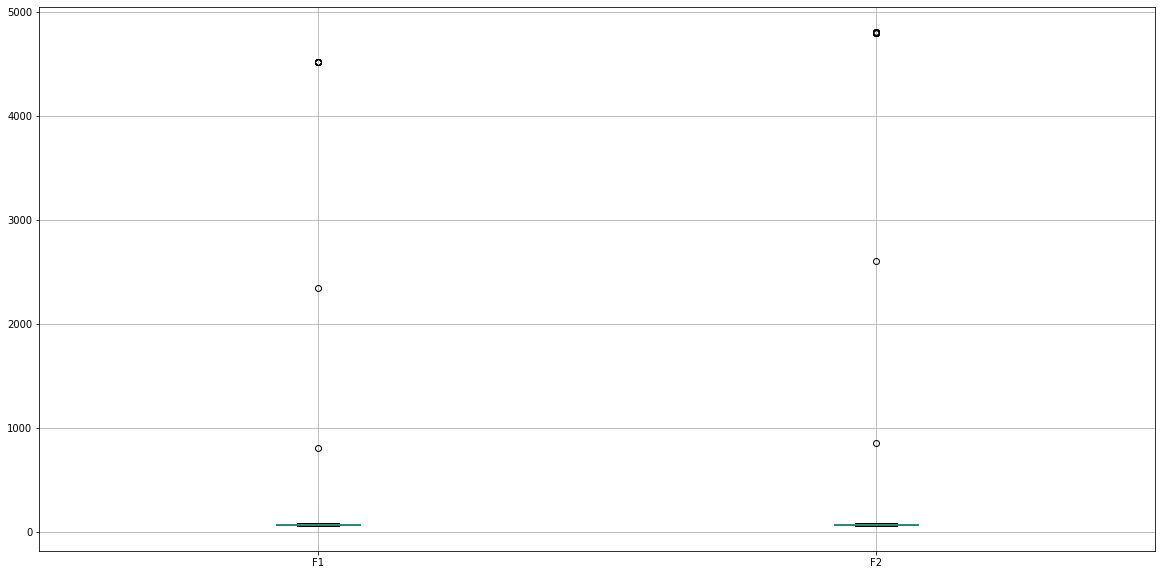

In [10]:
plt.figure(figsize = (20, 10))
df.boxplot(column = ['F1', 'F2'])

## Duration 생성

In [11]:
# object나 datetime 형식은 Model의 Feature로써 사용할 수 없으므로 Integer 형식의 공정 소요시간을 만듦

train['start_time'] = pd.to_datetime(train['start_time'], format="%Y-%m-%d %H:%M:%S")
train['end_time'] = pd.to_datetime(train['end_time'], format="%Y-%m-%d %H:%M:%S")

test['start_time'] = pd.to_datetime(test['start_time'], format="%Y-%m-%d %H:%M:%S")
test['end_time'] = pd.to_datetime(test['end_time'], format="%Y-%m-%d %H:%M:%S")

In [12]:
train['duration'] = (train['end_time'] - train['start_time']).dt.seconds
test['duration'] = (test['end_time'] - test['start_time']).dt.seconds

In [13]:
train.shape, test.shape

((3959, 76), (1000, 75))

In [14]:
train.head()

,Y,material_type,product_type,shift,start_time,end_time,thick,width,length,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,B3,B4,C1,D1,E1,E2,E3,E4,E5,E6,E7,E8,F1,F2,F3,F4,G1,G2,G3,G4,G5,G6,G7,G8,H1,H2,H3,H4,I1,I2,J1,J2,J3,J4,J5,J6,J7,J8,K1,K2,L1,M1,N1,N2,O1,O2,P1,Q1,R1,S1,S2,T1,U1,V1,W1,X1,duration
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,184.96,A,D,D,2019-02-15 10:35:00,2019-02-15 11:18:00,41.0,563.5,2088.5,6.965,7.890,7.635,7.670,6.850,7.230,8.965,6.260,7.070,4.895,5.845,5.245,5.485,4.895,3.520,-0.905,-0.435,-0.195,1.085,6.375,2.860,6.420,74.00,74.000,25.810,38.805,54.365,228.5,-5.850,1.420,-3.305,2.565,53.930,403.4,553.4,508.070,553.4,453.5,453.5,503.45,603.5,757.10,453.5,453.5,454.85,453.5,453.5,53.5,28.255,43.500,58.335,66.005,71.00,71.00,51.015,28.665,14.035,88.580,68.245,62.730,42.695,63.420,109.335,58.066667,105.391685,8.868492,2580
2,184.96,A,D,D,2019-02-15 11:18:00,2019-02-15 12:01:00,41.0,563.5,2088.5,6.965,7.875,7.625,7.665,6.855,7.215,8.970,6.190,7.085,4.880,5.840,5.245,5.475,4.880,3.520,-0.835,-0.390,-0.185,0.970,6.135,2.550,6.525,73.82,75.000,25.370,38.790,53.545,228.5,-5.895,1.285,-3.130,2.525,54.050,403.4,553.4,507.800,553.4,453.5,453.5,503.45,603.5,757.10,453.5,453.5,454.85,453.5,453.5,53.5,28.285,43.490,58.325,65.980,70.99,71.01,50.990,28.660,14.045,88.430,68.510,62.925,42.860,63.145,109.755,58.066667,105.511868,8.847720,2580
3,184.96,A,D,D,2019-02-15 12:01:00,2019-02-15 12:43:00,41.0,563.5,2088.5,6.975,7.880,7.620,7.655,6.835,7.225,8.970,6.230,7.080,4.885,5.845,5.225,5.480,4.885,3.525,-0.575,-0.275,0.245,1.230,6.505,2.990,6.505,71.50,72.000,25.965,38.765,53.495,228.5,-5.985,1.150,-3.200,2.490,54.045,403.4,553.4,507.865,553.4,453.5,453.5,503.45,603.5,757.10,453.5,453.5,454.85,453.5,453.5,53.5,28.330,43.525,58.335,66.005,71.00,71.02,50.995,28.665,14.010,88.100,68.160,62.770,43.090,63.265,109.970,58.066667,105.488896,8.883399,2520
4,184.96,A,D,D,2019-02-15 12:43:00,2019-02-15 13:25:00,41.0,563.5,2088.5,6.980,7.885,7.630,7.650,6.850,7.215,8.970,6.240,7.085,4.885,5.850,5.225,5.475,4.885,3.520,-0.295,0.065,0.595,1.465,6.745,3.130,6.585,70.71,69.500,26.135,38.785,53.325,228.5,-5.975,1.320,-2.895,2.505,54.110,403.4,553.4,507.845,553.4,453.5,453.5,503.45,603.5,757.10,453.5,453.5,454.85,453.5,453.5,53.5,28.195,43.515,58.285,66.000,71.00,71.01,51.000,28.710,14.050,88.485,68.275,62.860,43.275,63.160,109.270,58.066667,105.589947,8.878033,2520
5,184.96,A,D,D,2019-02-15 13:25:00,2019-02-15 14:07:00,41.0,563.5,2088.5,6.980,7.880,7.620,7.635,6.830,7.230,8.945,6.225,7.080,4.880,5.860,5.260,5.475,4.880,3.525,-1.405,-0.925,-0.545,0.575,5.805,2.455,6.490,71.50,71.805,25.225,38.810,53.335,228.5,-5.920,1.195,-3.195,2.490,52.715,403.4,553.4,507.945,553.4,453.5,453.5,503.45,603.5,757.11,453.5,453.5,454.85,453.5,453.5,53.5,28.205,43.460,58.285,65.980,71.00,71.00,50.990,28.660,14.030,88.405,68.310,62.985,43.680,63.230,109.380,58.066667,105.658513,8.873243,2520


## N/A 없애기

In [15]:
# NA값 확인

for (col, count) in train.isnull().sum().iteritems():
    if count != 0:
        print((col, count))

('shift', 23)
('E2', 641)
('H2', 651)
('K2', 641)


In [16]:
# 위에서 'start_time' 기준으로 정렬했으므로 'shift' NA 값은 앞뒤 row와 같은 값일 확률이 높음

train['shift'] = train['shift'].ffill().bfill()
test['shift'] = test['shift'].ffill().bfill()

In [17]:
train.columns[6:]

Index(['thick', 'width', 'length', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'B1', 'B2', 'B3', 'B4', 'C1', 'D1', 'E1', 'E2', 'E3', 'E4', 'E5',
       'E6', 'E7', 'E8', 'F1', 'F2', 'F3', 'F4', 'G1', 'G2', 'G3', 'G4', 'G5',
       'G6', 'G7', 'G8', 'H1', 'H2', 'H3', 'H4', 'I1', 'I2', 'J1', 'J2', 'J3',
       'J4', 'J5', 'J6', 'J7', 'J8', 'K1', 'K2', 'L1', 'M1', 'N1', 'N2', 'O1',
       'O2', 'P1', 'Q1', 'R1', 'S1', 'S2', 'T1', 'U1', 'V1', 'W1', 'X1',
       'duration'],
      dtype='object')

In [18]:
# 나머지 NA값이 존재하는 3개 feature는 3959개 중 NA값이 600개가 넘어서 모두 삭제할 경우 데이터 손실이 너무 큼
# 평균값으로 채워줌

for col in train.columns[6:]:
    train[col] = train[col].fillna(train[col].mean())
    test[col] = test[col].fillna(train[col].mean()) 

In [19]:
print(train.isnull().sum().sum(), test.isnull().sum().sum())

0 0


## Label Encoding

In [20]:
train.dtypes[:6]

Y                       float64
material_type            object
product_type             object
shift                    object
start_time       datetime64[ns]
end_time         datetime64[ns]
dtype: object

In [21]:
object_col = ['material_type', 'product_type', 'shift']

for col in object_col:
    lbl = LabelEncoder()    
    lbl.fit(train[col])   
    train[col] = lbl.transform(train[col])   
    test[col] = lbl.transform(test[col])   

In [22]:
train.head() 

,Y,material_type,product_type,shift,start_time,end_time,thick,width,length,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,B3,B4,C1,D1,E1,E2,E3,E4,E5,E6,E7,E8,F1,F2,F3,F4,G1,G2,G3,G4,G5,G6,G7,G8,H1,H2,H3,H4,I1,I2,J1,J2,J3,J4,J5,J6,J7,J8,K1,K2,L1,M1,N1,N2,O1,O2,P1,Q1,R1,S1,S2,T1,U1,V1,W1,X1,duration
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,184.96,0,1,3,2019-02-15 10:35:00,2019-02-15 11:18:00,41.0,563.5,2088.5,6.965,7.890,7.635,7.670,6.850,7.230,8.965,6.260,7.070,4.895,5.845,5.245,5.485,4.895,3.520,-0.905,-0.435,-0.195,1.085,6.375,2.860,6.420,74.00,74.000,25.810,38.805,54.365,228.5,-5.850,1.420,-3.305,2.565,53.930,403.4,553.4,508.070,553.4,453.5,453.5,503.45,603.5,757.10,453.5,453.5,454.85,453.5,453.5,53.5,28.255,43.500,58.335,66.005,71.00,71.00,51.015,28.665,14.035,88.580,68.245,62.730,42.695,63.420,109.335,58.066667,105.391685,8.868492,2580
2,184.96,0,1,3,2019-02-15 11:18:00,2019-02-15 12:01:00,41.0,563.5,2088.5,6.965,7.875,7.625,7.665,6.855,7.215,8.970,6.190,7.085,4.880,5.840,5.245,5.475,4.880,3.520,-0.835,-0.390,-0.185,0.970,6.135,2.550,6.525,73.82,75.000,25.370,38.790,53.545,228.5,-5.895,1.285,-3.130,2.525,54.050,403.4,553.4,507.800,553.4,453.5,453.5,503.45,603.5,757.10,453.5,453.5,454.85,453.5,453.5,53.5,28.285,43.490,58.325,65.980,70.99,71.01,50.990,28.660,14.045,88.430,68.510,62.925,42.860,63.145,109.755,58.066667,105.511868,8.847720,2580
3,184.96,0,1,3,2019-02-15 12:01:00,2019-02-15 12:43:00,41.0,563.5,2088.5,6.975,7.880,7.620,7.655,6.835,7.225,8.970,6.230,7.080,4.885,5.845,5.225,5.480,4.885,3.525,-0.575,-0.275,0.245,1.230,6.505,2.990,6.505,71.50,72.000,25.965,38.765,53.495,228.5,-5.985,1.150,-3.200,2.490,54.045,403.4,553.4,507.865,553.4,453.5,453.5,503.45,603.5,757.10,453.5,453.5,454.85,453.5,453.5,53.5,28.330,43.525,58.335,66.005,71.00,71.02,50.995,28.665,14.010,88.100,68.160,62.770,43.090,63.265,109.970,58.066667,105.488896,8.883399,2520
4,184.96,0,1,3,2019-02-15 12:43:00,2019-02-15 13:25:00,41.0,563.5,2088.5,6.980,7.885,7.630,7.650,6.850,7.215,8.970,6.240,7.085,4.885,5.850,5.225,5.475,4.885,3.520,-0.295,0.065,0.595,1.465,6.745,3.130,6.585,70.71,69.500,26.135,38.785,53.325,228.5,-5.975,1.320,-2.895,2.505,54.110,403.4,553.4,507.845,553.4,453.5,453.5,503.45,603.5,757.10,453.5,453.5,454.85,453.5,453.5,53.5,28.195,43.515,58.285,66.000,71.00,71.01,51.000,28.710,14.050,88.485,68.275,62.860,43.275,63.160,109.270,58.066667,105.589947,8.878033,2520
5,184.96,0,1,3,2019-02-15 13:25:00,2019-02-15 14:07:00,41.0,563.5,2088.5,6.980,7.880,7.620,7.635,6.830,7.230,8.945,6.225,7.080,4.880,5.860,5.260,5.475,4.880,3.525,-1.405,-0.925,-0.545,0.575,5.805,2.455,6.490,71.50,71.805,25.225,38.810,53.335,228.5,-5.920,1.195,-3.195,2.490,52.715,403.4,553.4,507.945,553.4,453.5,453.5,503.45,603.5,757.11,453.5,453.5,454.85,453.5,453.5,53.5,28.205,43.460,58.285,65.980,71.00,71.00,50.990,28.660,14.030,88.405,68.310,62.985,43.680,63.230,109.380,58.066667,105.658513,8.873243,2520


In [23]:
test.head()

,material_type,product_type,shift,start_time,end_time,thick,width,length,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,B3,B4,C1,D1,E1,E2,E3,E4,E5,E6,E7,E8,F1,F2,F3,F4,G1,G2,G3,G4,G5,G6,G7,G8,H1,H2,H3,H4,I1,I2,J1,J2,J3,J4,J5,J6,J7,J8,K1,K2,L1,M1,N1,N2,O1,O2,P1,Q1,R1,S1,S2,T1,U1,V1,W1,X1,duration
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,3,2020-06-09 14:27:00,2020-06-09 15:02:00,41.0,793.5,1388.5,6.975,7.860,7.585,7.625,6.830,7.075,8.835,6.020,6.515,4.785,5.630,5.155,5.340,4.785,3.520,1.825,3.235,2.755,3.130,11.180,5.070,7.720,77.0,77.0,28.470,45.25,52.565,68.5,-4.155,1.585,-2.715,1.040,57.520,403.4,553.4,507.850,553.4,453.5,453.5,503.45,603.5,757.115,453.5,453.5,454.85,453.5,453.5,43.5,28.495,43.520,58.515,66.010,71.005,70.995,51.000,28.495,14.575,102.985,68.335,65.170,64.325,63.190,58.34,61.036667,115.392407,9.127567,2100
2,0,0,1,2020-06-09 15:02:00,2020-06-09 15:37:00,41.0,793.5,1388.5,6.975,7.850,7.580,7.635,6.825,7.075,8.835,6.125,6.525,4.805,5.630,5.155,5.330,4.805,3.525,2.170,3.500,2.825,3.235,11.335,4.965,7.770,77.0,77.5,27.525,45.21,52.535,68.5,-4.245,1.495,-2.725,1.000,57.210,403.4,553.4,507.720,553.4,453.5,453.5,503.45,603.5,757.140,453.5,453.5,454.85,453.5,453.5,43.5,28.490,43.485,58.495,65.995,71.000,71.000,51.000,28.500,14.790,103.385,67.735,65.270,64.715,63.455,58.56,60.496667,111.817663,9.209064,2100
3,0,0,1,2020-06-09 15:37:00,2020-06-09 16:12:00,41.5,793.5,1388.5,6.970,7.870,7.585,7.635,6.820,7.070,8.835,6.090,6.525,4.810,5.625,5.160,5.335,4.810,3.520,1.270,2.475,1.975,2.670,10.660,4.810,7.705,77.0,77.5,27.225,45.20,52.425,68.5,-4.325,1.375,-2.760,0.985,56.990,403.4,553.4,507.800,553.4,453.5,453.5,503.45,603.5,757.210,453.5,453.5,454.85,453.5,453.5,43.5,28.500,43.485,58.505,65.995,71.005,70.990,51.000,28.490,14.845,103.610,68.285,65.085,64.530,63.485,58.54,58.696667,110.822125,9.058176,2100
4,0,0,1,2020-06-09 16:46:00,2020-06-09 17:21:00,41.0,793.5,1388.5,6.975,7.865,7.575,7.630,6.835,7.065,8.860,6.085,6.565,4.805,5.630,5.135,5.335,4.805,3.530,2.620,3.985,3.230,3.645,11.630,5.280,7.950,77.0,77.5,27.585,45.28,52.440,68.5,-4.065,1.630,-2.620,0.925,57.355,403.4,553.4,507.890,553.4,453.5,453.5,503.45,603.5,757.135,453.5,453.5,454.85,453.5,453.5,43.5,28.475,43.465,58.475,65.890,70.940,70.985,51.005,28.490,14.800,103.650,68.250,65.105,63.040,63.290,58.49,60.496667,106.870781,9.011051,2100
5,0,0,1,2020-06-09 17:21:00,2020-06-09 17:56:00,41.0,793.5,1388.5,6.960,7.860,7.575,7.615,6.830,7.060,8.860,6.060,6.530,4.805,5.630,5.150,5.335,4.805,3.535,1.465,3.185,2.905,3.020,11.270,4.945,7.525,77.0,77.5,26.855,45.22,52.340,68.5,-4.070,1.445,-3.095,0.950,57.745,403.4,553.4,507.765,553.4,453.5,453.5,503.45,603.5,757.100,453.5,453.5,454.85,453.5,453.5,43.5,28.530,43.510,58.495,65.980,71.010,71.005,51.000,28.490,14.990,103.975,68.195,65.135,63.015,63.330,58.35,58.696667,110.608023,8.912251,2100


## Standardization

In [24]:
# 이미 'start_time'과 'end_time'을 통해 'duration' 생성하였으므로 feature로 사용할 수 없는 datetime 형식 column 삭제

train = train.drop(columns = ['start_time', 'end_time'])
test = test.drop(columns = ['start_time', 'end_time'])

In [25]:
y = train['Y'].copy()  
X = train.drop(['Y'],1) 

In [26]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X -= X_mean
X /= X_std

In [27]:
test -= X_mean
test /= X_std

In [28]:
# StandardScaler 사용할 경우 마지막에 pred_test 값에 reverse transform 해 줄 수 없으므로(Series에 Scaler 사용 불가)
# 직접 mean과 std를 이용해 Scaling하고 pred_test을 reverse 할 수 있도록 값을 저장해 둠

y_mean = y.mean()
y_std = y.std()
y -= y_mean
y /= y_std

In [29]:
train

,Y,material_type,product_type,shift,thick,width,length,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,B3,B4,C1,D1,E1,E2,E3,E4,E5,E6,E7,E8,F1,F2,F3,F4,G1,G2,G3,G4,G5,G6,G7,G8,H1,H2,H3,H4,I1,I2,J1,J2,J3,J4,J5,J6,J7,J8,K1,K2,L1,M1,N1,N2,O1,O2,P1,Q1,R1,S1,S2,T1,U1,V1,W1,X1,duration
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,184.9600,0,1,3,41.0,563.5,2088.5,6.965,7.890,7.635,7.670,6.850,7.230,8.965,6.260,7.070,4.895,5.845,5.245,5.485,4.895,3.520,-0.905,-0.435,-0.195,1.085,6.375,2.860,6.420,74.000,74.000,25.810,38.805,54.365,228.5,-5.850,1.420,-3.305,2.565,53.930,403.4,553.4,508.070,553.4,453.5,453.5,503.45,603.5,757.100,453.5,453.5,454.85,453.5,453.5,53.5,28.255,43.500,58.335,66.005,71.000,71.000,51.015,28.665,14.035,88.580,68.245,62.730,42.695,63.420,109.335,58.066667,105.391685,8.868492,2580
2,184.9600,0,1,3,41.0,563.5,2088.5,6.965,7.875,7.625,7.665,6.855,7.215,8.970,6.190,7.085,4.880,5.840,5.245,5.475,4.880,3.520,-0.835,-0.390,-0.185,0.970,6.135,2.550,6.525,73.820,75.000,25.370,38.790,53.545,228.5,-5.895,1.285,-3.130,2.525,54.050,403.4,553.4,507.800,553.4,453.5,453.5,503.45,603.5,757.100,453.5,453.5,454.85,453.5,453.5,53.5,28.285,43.490,58.325,65.980,70.990,71.010,50.990,28.660,14.045,88.430,68.510,62.925,42.860,63.145,109.755,58.066667,105.511868,8.847720,2580
3,184.9600,0,1,3,41.0,563.5,2088.5,6.975,7.880,7.620,7.655,6.835,7.225,8.970,6.230,7.080,4.885,5.845,5.225,5.480,4.885,3.525,-0.575,-0.275,0.245,1.230,6.505,2.990,6.505,71.500,72.000,25.965,38.765,53.495,228.5,-5.985,1.150,-3.200,2.490,54.045,403.4,553.4,507.865,553.4,453.5,453.5,503.45,603.5,757.100,453.5,453.5,454.85,453.5,453.5,53.5,28.330,43.525,58.335,66.005,71.000,71.020,50.995,28.665,14.010,88.100,68.160,62.770,43.090,63.265,109.970,58.066667,105.488896,8.883399,2520
4,184.9600,0,1,3,41.0,563.5,2088.5,6.980,7.885,7.630,7.650,6.850,7.215,8.970,6.240,7.085,4.885,5.850,5.225,5.475,4.885,3.520,-0.295,0.065,0.595,1.465,6.745,3.130,6.585,70.710,69.500,26.135,38.785,53.325,228.5,-5.975,1.320,-2.895,2.505,54.110,403.4,553.4,507.845,553.4,453.5,453.5,503.45,603.5,757.100,453.5,453.5,454.85,453.5,453.5,53.5,28.195,43.515,58.285,66.000,71.000,71.010,51.000,28.710,14.050,88.485,68.275,62.860,43.275,63.160,109.270,58.066667,105.589947,8.878033,2520
5,184.9600,0,1,3,41.0,563.5,2088.5,6.980,7.880,7.620,7.635,6.830,7.230,8.945,6.225,7.080,4.880,5.860,5.260,5.475,4.880,3.525,-1.405,-0.925,-0.545,0.575,5.805,2.455,6.490,71.500,71.805,25.225,38.810,53.335,228.5,-5.920,1.195,-3.195,2.490,52.715,403.4,553.4,507.945,553.4,453.5,453.5,503.45,603.5,757.110,453.5,453.5,454.85,453.5,453.5,53.5,28.205,43.460,58.285,65.980,71.000,71.000,50.990,28.660,14.030,88.405,68.310,62.985,43.680,63.230,109.380,58.066667,105.658513,8.873243,2520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,199.6569,0,0,3,41.0,793.5,1388.5,6.980,7.865,7.585,7.625,6.820,7.065,8.870,6.040,6.530,4.760,5.635,5.100,5.325,4.760,3.535,4.845,6.130,5.460,5.135,13.005,6.340,8.310,77.295,77.500,24.685,45.220,52.585,68.5,-3.745,2.375,-1.985,1.865,56.830,403.4,553.4,507.795,553.4,453.5,453.5,503.45,603.5,757.155,453.5,453.5,454.85,453.5,453.5,43.5,28.535,43.525,58.550,66.210,71.235,71.080,51.000,28.495,15.685,103.000,68.380,64.895,64.190,63.225,58.345,61.036667,109.533370,9.089828,2100
3956,199.6569,0,0,3,41.0,793.5,1388.5,6.975,7.875,7.585,7.635,6.825,7.065,8.870,6.115,6.535,4.760,5.635,5.110,5.335,4.760,3.530,4.570,5.905,5.035,4.990,12.995,6.340,8.445,77.000,77.500,24.930,45.215,52.585,68.5,-3.680,2.320,-1.980,1.740,57.050,403.4,553.4,507.840,553.4,453.5,453.5,503.45,603.5,757.165,453.5,453.5,454.85,453.5,453.5,43.5,28.495,43.550,58.505,66.015,71.005,71.005,51.000,28.485,15.545,103.355,67.855,65.130,63.845,63.285,58.405,62.836667,111.802546,8.980771,2160
395

In [30]:
X

,material_type,product_type,shift,thick,width,length,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,B3,B4,C1,D1,E1,E2,E3,E4,E5,E6,E7,E8,F1,F2,F3,F4,G1,G2,G3,G4,G5,G6,G7,G8,H1,H2,H3,H4,I1,I2,J1,J2,J3,J4,J5,J6,J7,J8,K1,K2,L1,M1,N1,N2,O1,O2,P1,Q1,R1,S1,S2,T1,U1,V1,W1,X1,duration
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.360304,1.678402,1.331512,0.66686,-2.439527,0.528423,-0.324123,0.173619,0.497737,0.467316,-1.717867,0.906600,0.798940,1.077710,1.680067,-0.360253,1.532501,0.627169,0.644366,-0.360253,-1.119977,0.156607,-0.043264,-0.015134,-0.066095,-0.580993,-0.202683,-0.889493,-0.039166,-0.039194,1.339785,-1.208515,0.529930,1.385430,-0.609492,0.879681,-0.141166,0.560408,-0.512538,0.190669,0.276108,0.017231,0.277997,-0.023754,0.244069,0.650582,0.097646,0.033955,-0.974488,0.072933,-0.055148,-0.122764,0.221157,0.454763,-0.275534,-0.123576,-0.339651,0.766838,0.796214,0.773896,0.725189,0.299173,-1.186098,-2.783213,-0.045422,-0.683199,-3.031986,0.359460,3.436371,-0.231053,-0.256301,-0.327095,0.326979
2,-0.360304,1.678402,1.331512,0.66686,-2.439527,0.528423,-0.324123,0.090725,0.384984,0.438363,-1.645102,0.801740,0.819753,0.249394,1.746324,-0.473567,1.457005,0.627169,0.557423,-0.473567,-1.119977,0.169599,-0.034872,-0.013089,-0.097183,-0.647956,-0.315022,-0.783529,-0.040003,-0.034831,0.974391,-1.210352,0.271391,1.385430,-0.640642,0.781486,-0.018698,0.525832,-0.450917,0.190669,0.276108,0.002837,0.277997,-0.023754,0.244069,0.650582,0.097646,0.033955,-0.974488,0.072933,-0.055148,-0.122764,0.221157,0.454763,-0.256690,-0.138905,-0.358151,0.746825,0.788436,0.781452,0.706340,0.288955,-1.171510,-2.814760,0.103480,-0.595436,-2.999221,0.266985,3.466306,-0.231053,-0.231074,-0.471937,0.326979
3,-0.360304,1.678402,1.331512,0.66686,-2.439527,0.528423,-0.295427,0.118356,0.328607,0.380457,-1.936164,0.871646,0.819753,0.722718,1.724238,-0.435796,1.532501,0.485678,0.600894,-0.435796,0.006545,0.217858,-0.013425,0.074840,-0.026898,-0.544722,-0.155574,-0.803713,-0.050788,-0.047921,1.468504,-1.213414,0.255626,1.385430,-0.702944,0.683290,-0.067685,0.495578,-0.453484,0.190669,0.276108,0.006302,0.277997,-0.023754,0.244069,0.650582,0.097646,0.033955,-0.974488,0.072933,-0.055148,-0.122764,0.221157,0.454763,-0.228424,-0.085254,-0.339651,0.766838,0.796214,0.789007,0.710110,0.299173,-1.222569,-2.884164,-0.093183,-0.665196,-2.953548,0.307338,3.481630,-0.231053,-0.235896,-0.223151,0.079699
4,-0.360304,1.678402,1.331512,0.66686,-2.439527,0.528423,-0.281079,0.145988,0.441360,0.351504,-1.717867,0.801740,0.819753,0.841049,1.746324,-0.435796,1.607996,0.485678,0.557423,-0.435796,-1.119977,0.269828,0.049984,0.146410,0.036629,-0.477759,-0.104840,-0.722978,-0.054461,-0.058830,1.609679,-1.210964,0.202027,1.385430,-0.696021,0.806944,0.145758,0.508544,-0.420106,0.190669,0.276108,0.005236,0.277997,-0.023754,0.244069,0.650582,0.097646,0.033955,-0.974488,0.072933,-0.055148,-0.122764,0.221157,0.454763,-0.313222,-0.100583,-0.432151,0.762836,0.796214,0.781452,0.713880,0.391133,-1.164215,-2.803193,-0.028565,-0.624690,-2.916811,0.272029,3.431738,-0.231053,-0.214684,-0.260567,0.079699
5,-0.360304,1.678402,1.331512,0.66686,-2.439527,0.528423,-0.281079,0.118356,0.328607,0.264644,-2.008930,0.906600,0.715685,0.663552,1.724238,-0.473567,1.758986,0.733288,0.557423,-0.473567,0.006545,0.063803,-0.134648,-0.086704,-0.203963,-0.740030,-0.349448,-0.818850,-0.050788,-0.048772,0.853977,-1.207902,0.205180,1.385430,-0.657948,0.716022,-0.064186,0.495578,-1.136457,0.190669,0.276108,0.010567,0.277997,-0.023754,0.244069,0.650582,0.097646,0.034251,-0.974488,0.072933,-0.055148,-0.122764,0.221157,0.454763,-0.306940,-0.184890,-0.432151,0.746825,0.796214,0.773896,0.706340,0.288955,-1.193392,-2.820018,-0.008899,-0.568432,-2.836387,0.295568,3.439578,-0.231053,-0.200292,-0.293968,0.079699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [31]:
y

idx
1      -0.239430
2      -0.239430
3      -0.239430
4      -0.239430
5      -0.239430
          ...   
3955    1.884157
3956    1.884157
3957    1.639676
3958    1.884157
3959    1.073267
Name: Y, Length: 3959, dtype: float64

In [32]:
test

,material_type,product_type,shift,thick,width,length,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,B3,B4,C1,D1,E1,E2,E3,E4,E5,E6,E7,E8,F1,F2,F3,F4,G1,G2,G3,G4,G5,G6,G7,G8,H1,H2,H3,H4,I1,I2,J1,J2,J3,J4,J5,J6,J7,J8,K1,K2,L1,M1,N1,N2,O1,O2,P1,Q1,R1,S1,S2,T1,U1,V1,W1,X1,duration
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.360304,-0.595654,1.331512,0.666860,0.461803,-1.634790,-0.295427,0.007831,-0.066032,0.206738,-2.008930,-0.176957,0.257782,-1.762230,-0.771426,-1.191220,-1.713792,-0.009542,-0.616311,-1.191220,-1.119977,0.663317,0.641181,0.588099,0.486725,0.759658,0.598180,0.422445,-0.025220,-0.026104,3.548762,-0.419112,-0.037594,-0.695669,0.563851,0.999698,0.271725,-0.757794,1.330976,0.190669,0.276108,0.005503,0.277997,-0.023754,0.244069,0.650582,0.097646,0.034399,-0.974488,0.072933,-0.055148,-0.122764,0.221157,-0.944962,-0.124781,-0.092919,-0.006652,0.770841,0.800103,0.770118,0.713880,-0.048232,-0.398329,0.246342,0.005148,0.414960,1.263260,0.282118,-0.198211,1.075321,1.842942,1.479391,-1.651262
2,-0.360304,-0.595654,-0.481231,0.666860,0.461803,-1.634790,-0.295427,-0.047432,-0.122409,0.264644,-2.081695,-0.176957,0.257782,-0.519756,-0.727255,-1.040135,-1.713792,-0.009542,-0.703254,-1.040135,0.006545,0.727352,0.690603,0.602413,0.515109,0.802905,0.560130,0.472904,-0.025220,-0.023922,2.763994,-0.424012,-0.047053,-0.695669,0.501550,0.934235,0.264727,-0.792369,1.171787,0.190669,0.276108,-0.001428,0.277997,-0.023754,0.244069,0.650582,0.097646,0.035139,-0.974488,0.072933,-0.055148,-0.122764,0.221157,-0.944962,-0.127922,-0.146569,-0.043652,0.758833,0.796214,0.773896,0.713880,-0.038014,-0.084680,0.330467,-0.331989,0.459967,1.340705,0.371230,-0.182531,0.837798,1.092571,2.047660,-1.651262
3,-0.360304,-0.595654,-0.481231,0.751918,0.461803,-1.634790,-0.309775,0.063094,-0.066032,0.264644,-2.154461,-0.211910,0.257782,-0.933914,-0.727255,-1.002364,-1.789287,0.025830,-0.659782,-1.002364,-1.119977,0.560304,0.499443,0.428600,0.362374,0.614572,0.503961,0.407307,-0.025220,-0.023922,2.514862,-0.425237,-0.081735,-0.695669,0.446171,0.846949,0.240233,-0.805335,1.058814,0.190669,0.276108,0.002837,0.277997,-0.023754,0.244069,0.650582,0.097646,0.037212,-0.974488,0.072933,-0.055148,-0.122764,0.221157,-0.944962,-0.121641,-0.146569,-0.025152,0.758833,0.800103,0.766340,0.713880,-0.058450,-0.004444,0.377787,-0.022946,0.376705,1.303968,0.381318,-0.183956,0.046057,0.883598,0.995539,-1.651262
4,-0.360304,-0.595654,-0.481231,0.666860,0.461803,-1.634790,-0.295427,0.035462,-0.178786,0.235691,-1.936164,-0.246864,0.361851,-0.993079,-0.550570,-1.040135,-1.713792,-0.151034,-0.659782,-1.040135,1.133066,0.810875,0.781054,0.685229,0.625943,0.885214,0.674281,0.654557,-0.025220,-0.023922,2.813821,-0.415438,-0.077006,-0.695669,0.626152,1.032430,0.338207,-0.857199,1.246246,0.190669,0.276108,0.007635,0.277997,-0.023754,0.244069,0.650582,0.097646,0.034991,-0.974488,0.072933,-0.055148,-0.122764,0.221157,-0.944962,-0.137344,-0.177226,-0.080652,0.674778,0.749546,0.762563,0.717650,-0.058450,-0.070091,0.386200,-0.042613,0.385706,1.008087,0.315745,-0.187520,0.837798,0.054175,0.666942,-1.651262
5,-0.360304,-0.595654,-0.481231,0.666860,0.461803,-1.634790,-0.338471,0.007831,-0.178786,0.148832,-2.008930,-0.281817,0.361851,-1.288906,-0.705169,-1.040135,-1.713792,-0.044915,-0.659782,-1.040135,2.259588,0.596498,0.631856,0.618772,0.456989,0.784769,0.552883,0.225654,-0.025220,-0.023922,2.207598,-0.422787,-0.108535,-0.695669,0.622691,0.897866,0.005795,-0.835589,1.446516,0.190669,0.276108,0.000971,0.277997,-0.023754,0.244069,0.650582,0.097646,0.033955,-0.974488,0.072933,-0.055148,-0.122764,0.221157,-0.944962,-0.102797,-0.108247,-0.043652,0.746825,0.803992,0.777674,0.713880,-0.058450,0.207087,0.454552,-0.073517,0.399208,1.003122,0.329196,-0.197498,0.046057,0.838656,-0.021969,-1.651262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [33]:
X.describe()

,material_type,product_type,shift,thick,width,length,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,B3,B4,C1,D1,E1,E2,E3,E4,E5,E6,E7,E8,F1,F2,F3,F4,G1,G2,G3,G4,G5,G6,G7,G8,H1,H2,H3,H4,I1,I2,J1,J2,J3,J4,J5,J6,J7,J8,K1,K2,L1,M1,N1,N2,O1,O2,P1,Q1,R1,S1,S2,T1,U1,V1,W1,X1,duration
count,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03,3.959000e+03
mean,-1.035040e-15,7.897418e-15,-9.545843e-17,-2.503737e-15,5.757736e-15,-4.117837e-16,2.195832e-13,8.006354e-15,-6.271804e-13,-1.450488e-13,-6.565046e-13,1.530558e-13,9.192220e-15,5.925102e-14,1.520519e-13,1.310231e-14,3.906345e-13,5.888089e-14,1.441505e-13,1.310231e-14,-2.100404e-12,3.094519e-15,-4.652056e-16,-6.339124e-16,1.213982e-16,5.526437e-16,-2.033539e-15,-1.935131e-14,2.417685e-16,-6.777997e-17,-3.621217e-14,7.455026e-15,6.274399e-14,7.949242e-15,8.768098e-15,-4.544090e-16,-4.331594e-16,-3.818057e-16,-6.867510e-15,5.441333e-13,1.446670e-12,1.356789e-13,1.469300e-12,-1.367504e-14,3.917588e-14,8.915205e-13,-1.370504e-14,8.366868e-13,4.384950e-13,4.312671e-14,-9.633096e-13,5.837925e-16,-2.975049e-14,5.996326e-15,3.513650e-16,1.138382e-12,1.153605e-13,3.797305e-15,7.117873e-14,-1.920305e-13,4.464319e-14,-7.415300e-14,4.732396e-14,-1.677451e-14,-2.195294e-14,6.594161e-15,-1.318975e-14,-1.155958e-14,9.501815e-16,2.455172e-14,3.220982e-14,6.942380e-14,-5.689704e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.603038e-01,-5.956545e-01,-1.387603e+00,-2.480267e+00,-2.944107e+00,-2.283754e+00,-3.896828e+00,-3.501354e+00,-3.561400e+00,-8.015951e+00,-4.337429e+00,-3.707254e+00,-4.342055e+00,-7.797102e+00,-3.090406e+00,-3.721893e+00,-4.884589e+00,-4.714133e+00,-4.007096e+00,-3.721893e+00,-3.373020e+00,-5.564761e+00,-5.467537e+00,-5.258144e+00,-5.132036e+00,-4.657356e+00,-4.475165e+00,-3.119787e+00,-1.158717e-01,-1.242842e-01,-3.825567e+00,-5.532775e+00,-1.110904e+01,-1.541116e+00,-3.700332e+00,-6.775952e+00,-3.342816e+00,-3.070048e+00,-2.353336e+01,-3.835921e+00,-3.369666e+00,-5.410549e+00,-7.268641e+00,-2.314273e+01,-3.275619e+00,-3.004841e+00,-1.226605e+01,-5.921732e+00,-3.408181e+00,-6.617747e+00,-3.789193e+00,-1.227639e-01,-3.908382e+00,-6.543862e+00,-1.566351e+00,-1.285399e+01,-1.170787e+01,-5.805442e+00,-5.150078e+00,-8.681919e+00,-4.94

In [34]:
y.describe()

count    3.959000e+03
mean     4.202515e-14
std      1.000000e+00
min     -2.807792e+00
25%     -7.479122e-01
50%     -2.394299e-01
75%      6.721566e-01
max      3.414777e+00
Name: Y, dtype: float64

In [35]:
test.describe()

,material_type,product_type,shift,thick,width,length,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,B3,B4,C1,D1,E1,E2,E3,E4,E5,E6,E7,E8,F1,F2,F3,F4,G1,G2,G3,G4,G5,G6,G7,G8,H1,H2,H3,H4,I1,I2,J1,J2,J3,J4,J5,J6,J7,J8,K1,K2,L1,M1,N1,N2,O1,O2,P1,Q1,R1,S1,S2,T1,U1,V1,W1,X1,duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.027990,0.157058,-0.017169,0.101738,0.178798,-0.236767,-0.086861,-0.180560,-0.034912,0.254105,-0.230466,-0.208625,0.288753,0.093671,-0.737679,0.209413,-1.011234,0.111680,-0.567318,0.209413,0.015557,0.053854,0.198065,0.090785,0.108573,0.467451,0.246184,0.780003,-0.037921,-0.036522,-0.588675,0.222628,-0.053610,-0.665558,0.460991,0.127931,0.351353,-0.064394,0.968153,1.906685e-01,0.241473,0.053335,2.779967e-01,-2.375427e-02,2.440686e-01,0.572108,9.764622e-02,0.040294,0.163910,7.293250e-02,-0.017161,-1.227639e-01,2.211572e-01,-0.043539,-0.082414,-0.075015,-0.061513,-0.085481,0.044372,0.044842,-0.020298,-0.042786,0.685956,0.002065,-0.057303,-0.136115,0.637967,0.122681,-0.374487,0.258837,0.263254,0.256789,-0.449728
std,0.965566,1.070645,1.023490,0.962192,0.859058,1.040045,0.262455,0.387304,0.334950,0.174556,0.681485,0.350909,0.357261,2.231235,0.350944,0.586935,0.607411,0.433384,0.182449,0.586935,1.078672,0.630501,0.623978,0.650762,0.650087,0.625774,0.636386,1.096866,0.020631,0.021170,1.056154,0.679163,0.612512,0.083139,0.590606,0.725254,0.607291,0.634429,2.380727,2.249327e-15,0.248994,0.369413,5.553893e-17,3.818301e-17,3.693339e-15,0.370394,2.346520e-15,0.444956,0.488200,1.110779e-16,0.266042,1.152433e-15,5.165120e-15,0.670545,0.483778,0.593000,0.292840,1.658354,0.958835,0.926440,0.918925,0.027295,1.034568,0.906810,0.089382,0.685149,0.797633,0.735930,0.331097,1.114442,1.117008,1.106167,0.883170
min,-0.360304,-0.595654,-1.387603,-1.544635,-2.439527,-1.634790,-0.424561,-2.257942,-0.291539,-0.256512,-2.663820,-0.980886,-1.636268,-1.821395,-1.986129,-1.606704,-2.317753,-1.742813,-0.833669,-1.606704,-3.373020,-1.938908,-2.007080,-2.367740,-2.684219,-2.225768,-2.442203,-0.894539,-0.088304,-0.087979,-4.714140,-0.975185,-8.288762,-0.695669,-1.606314,-2.062555,-1.820720,-2.585987,-21.055653,1.906685e-01,-1.546779,-0.015022,2.779967e-01,-2.375427e-02,2.440686e-01,-1.174390,9.764622e-02,-1.460666,-0.974488,7.293250e-02,-0.055148,-1.227639e-01,2.211572e-01,-0.944962,-0.426286,-0.775042,-5.732388,-24.885867,-2.163320,-1.968782,-1.261499,-0.170845,-1.944690,-2.906246,-0.368512,-2.758000,-1.733285,-3.151223,-1.303303,-2.883388,-2.923831,-2.636409,-2.393103
25%,-0.360304,-0.595654,-1.387603,-1.374520,0.461803,-1.634790,-0.309775,-0.434271,-0.178786,0.177785,-0.553618,-0.491538,0.216155,-1.170576,-0.837682,0.017459,-1.638297,-0.151034,-0.703254,0.017459,-1.119977,-0.333630,-0.171947,-0.324929,-0.289116,0.081660,-0.151044,0.033909,-0.062410,-0.058830,-1.189950,-0.421562,-0.083706,-0.695669,0.181390,-0.258662,-0.018698,-0.416358,0.016381,1.906685e-01,0.276108,-0.001428,2.779967e-01,-2.375427e-02,2.440686e-01,0.650582,9.764622e-02,0.033955,0.240534,7.293250e-02,-0.055148,-1.227639e-01,2.211572e-01,-0.944962,-0.134203,-0.184890,-0.062152,-1.226460,-1.140512,-1.108389,-1.171024,-0.048232,-0.186798,0.268425,-0.115659,-0.6

In [36]:
test.describe().iloc[1:3, :]

,material_type,product_type,shift,thick,width,length,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,B3,B4,C1,D1,E1,E2,E3,E4,E5,E6,E7,E8,F1,F2,F3,F4,G1,G2,G3,G4,G5,G6,G7,G8,H1,H2,H3,H4,I1,I2,J1,J2,J3,J4,J5,J6,J7,J8,K1,K2,L1,M1,N1,N2,O1,O2,P1,Q1,R1,S1,S2,T1,U1,V1,W1,X1,duration
mean,-0.027990,0.157058,-0.017169,0.101738,0.178798,-0.236767,-0.086861,-0.180560,-0.034912,0.254105,-0.230466,-0.208625,0.288753,0.093671,-0.737679,0.209413,-1.011234,0.111680,-0.567318,0.209413,0.015557,0.053854,0.198065,0.090785,0.108573,0.467451,0.246184,0.780003,-0.037921,-0.036522,-0.588675,0.222628,-0.053610,-0.665558,0.460991,0.127931,0.351353,-0.064394,0.968153,1.906685e-01,0.241473,0.053335,2.779967e-01,-2.375427e-02,2.440686e-01,0.572108,9.764622e-02,0.040294,0.16391,7.293250e-02,-0.017161,-1.227639e-01,2.211572e-01,-0.043539,-0.082414,-0.075015,-0.061513,-0.085481,0.044372,0.044842,-0.020298,-0.042786,0.685956,0.002065,-0.057303,-0.136115,0.637967,0.122681,-0.374487,0.258837,0.263254,0.256789,-0.449728
std,0.965566,1.070645,1.023490,0.962192,0.859058,1.040045,0.262455,0.387304,0.334950,0.174556,0.681485,0.350909,0.357261,2.231235,0.350944,0.586935,0.607411,0.433384,0.182449,0.586935,1.078672,0.630501,0.623978,0.650762,0.650087,0.625774,0.636386,1.096866,0.020631,0.021170,1.056154,0.679163,0.612512,0.083139,0.590606,0.725254,0.607291,0.634429,2.380727,2.249327e-15,0.248994,0.369413,5.553893e-17,3.818301e-17,3.693339e-15,0.370394,2.346520e-15,0.444956,0.48820,1.110779e-16,0.266042,1.152433e-15,5.165120e-15,0.670545,0.483778,0.593000,0.292840,1.658354,0.958835,0.926440,0.918925,0.027295,1.034568,0.906810,0.089382,0.685149,0.797633,0.735930,0.331097,1.114442,1.117008,1.106167,0.883170


In [37]:
test.columns

Index(['material_type', 'product_type', 'shift', 'thick', 'width', 'length',
       'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'B1', 'B2', 'B3', 'B4',
       'C1', 'D1', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'F1', 'F2',
       'F3', 'F4', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'H1', 'H2',
       'H3', 'H4', 'I1', 'I2', 'J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8',
       'K1', 'K2', 'L1', 'M1', 'N1', 'N2', 'O1', 'O2', 'P1', 'Q1', 'R1', 'S1',
       'S2', 'T1', 'U1', 'V1', 'W1', 'X1', 'duration'],
      dtype='object')

## 산점도 그리기

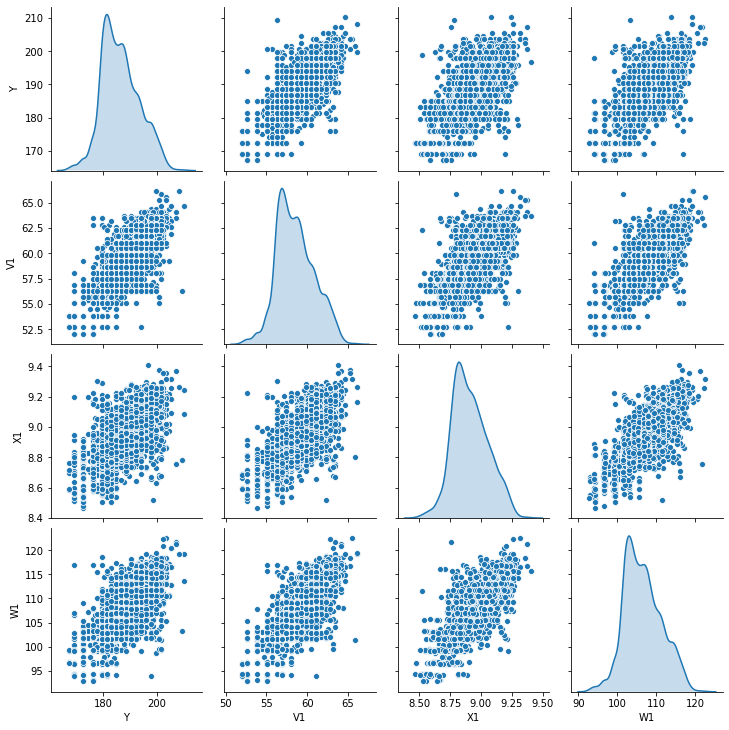

In [38]:
# 여러 가지 pairplot을 그려 data 경향성이나 관련성 파악

sns.pairplot(train[["Y", "V1", "X1", "W1"]], diag_kind="kde")

In [39]:
# trian data와 같은 기준으로 test data를 Scaling 했을 때 test data의 std가 1에서 많이 벗어나는 경우
# 학습 데이터와 예측 데이터의 경향성이 많이 다를 가능성이 크므로 해당 column을 삭제

weird = ['A1', 'A2', 'A3', 'A4', 'A6', 'A7', 'A8', 'B1', 'B2', 'B4',
         'C1', 'D1', 'F1', 'F2', 'G2', 'G3', 'G7', 'G8', 'H1', 'H2',
         'H3', 'H4', 'I1', 'I2', 'J1', 'J2', 'J3', 'J4', 'J5', 'J6',
         'J7', 'K1', 'K2', 'L1', 'M1', 'O2', 'R1', 'U1']

X = X.drop(columns = weird)
test = test.drop(columns = weird)

## train valid split

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2, random_state=1019)   

print(X.shape, y.shape, "-->", X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(3959, 35) (3959,) --> (3167, 35) (3167,) (792, 35) (792,)


## Random Forest 가중치 확인

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=20, max_features=12, random_state=1019)

rf.fit(X_train, y_train)
pred_train = rf.predict(X_train)
pred_valid = rf.predict(X_valid)

print(r2_score(y_train, pred_train), r2_score(y_valid, pred_valid))

0.9579274533384663 0.7219341219699696


In [42]:
temp= dict()
for idx, val in enumerate(rf.feature_importances_):
    temp[X.columns[idx]] = val
    
sorted(temp.items(), key = lambda x : x[1], reverse = True)

[('V1', 0.3985962879928832),
 ('W1', 0.1911600930399526),
 ('X1', 0.12056008159209047),
 ('F4', 0.020829694246694685),
 ('E8', 0.01942224030918405),
 ('G5', 0.01724448788371605),
 ('S1', 0.015650820380200946),
 ('G1', 0.013294514387283976),
 ('G6', 0.012983843718632912),
 ('P1', 0.012677807548628215),
 ('F3', 0.011585132561341348),
 ('G4', 0.011539068032184192),
 ('S2', 0.011226067125755539),
 ('A5', 0.011053593080985179),
 ('Q1', 0.010975498672040705),
 ('O1', 0.010659206206699627),
 ('T1', 0.010475224729076991),
 ('B3', 0.010359419428199783),
 ('N1', 0.00962085485828758),
 ('E7', 0.009132527283663499),
 ('E6', 0.00901864509081676),
 ('E2', 0.008740133636796262),
 ('E3', 0.007757988597139437),
 ('N2', 0.0075614245225816105),
 ('E5', 0.0072820312876076924),
 ('E4', 0.00672893121380531),
 ('shift', 0.005227558998850595),
 ('E1', 0.0040278996852140675),
 ('thick', 0.003816509138635367),
 ('duration', 0.003301381907766459),
 ('length', 0.002295892601940749),
 ('product_type', 0.0014426437

## Outlier 재확인

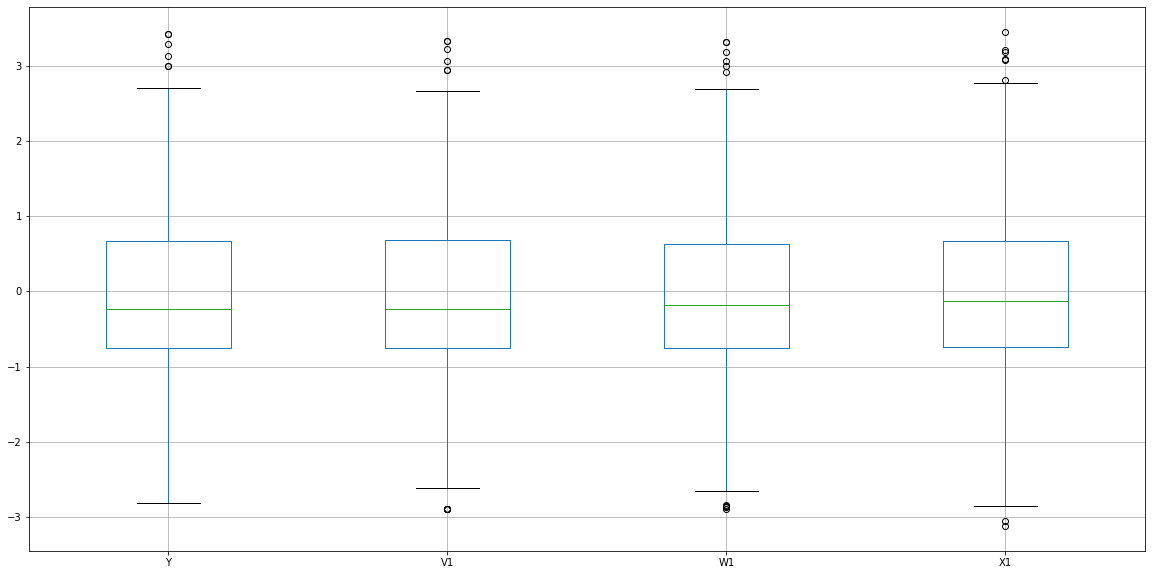

In [43]:
# Random Forest 가중치가 높은 'V1', 'W1', 'X1'의 IQR*1.5 밖의 값이'Y'와 관계없음이 명확하면 제거하려고 했으나,
# 비슷한 경향을 보여 해당 값을 삭제하지 않음

temp = pd.concat([X, y], axis=1)

plt.figure(figsize = (20, 10))
temp.boxplot(column = ['Y', 'V1', 'W1', 'X1'])

## 모델 만들기

In [44]:
# 데이터가 적어서 activation 함수로 relu를 사용할 경우 Overfitting이 심해지는 것으로 의심됨

def build_model():
  model = keras.Sequential([
    layers.Dense(128, activation='elu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.00005)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [45]:
model = build_model()

In [46]:
# model이 잘 만들어 졌는지 확인

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               4608      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 17,089
Trainable params: 17,089
Non-trainable params: 0
_________________________________________________________________


In [47]:
X_train[:10]

,material_type,product_type,shift,thick,width,length,A5,B3,E1,E2,E3,E4,E5,E6,E7,E8,F3,F4,G1,G4,G5,G6,J8,N1,N2,O1,P1,Q1,S1,S2,T1,V1,W1,X1,duration
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3631,-0.360304,-0.595654,0.425141,-1.459577,0.461803,0.528423,-1.863398,-1.336316,0.006545,2.521951e-01,0.378220,0.257855,0.306957,0.523893,0.382563,0.144919,-0.599298,0.925750,-0.143217,0.199585,0.604136,0.465324,0.454763,-1.043286,-1.077222,-1.163484,-0.821390,0.378839,0.709753,0.856175,0.340965,0.046057,0.019233,0.490339,0.079699
598,-0.360304,1.678402,-1.387603,0.666860,0.461803,0.528423,0.028507,-0.505869,1.133066,5.148304e-01,0.676615,1.147367,1.519376,1.384645,1.745119,1.875668,-0.669885,0.610969,-0.065971,-0.713272,1.751832,2.090385,0.454763,0.772880,0.762563,0.702571,0.652030,0.288404,0.311445,0.256469,0.303975,-1.022795,-1.515883,-1.777163,0.326979
1941,-0.360304,-0.595654,1.331512,-1.459577,0.461803,0.528423,0.174038,0.475568,-1.119977,-5.319989e-01,-0.391082,-0.505899,-0.575663,-0.551697,-0.673780,-0.521141,-1.799287,0.723653,0.030193,-0.705999,0.359201,-0.442290,0.454763,-1.144401,-1.122556,-1.174793,0.776031,0.215847,0.228183,0.451075,0.290524,0.560689,0.040578,0.494498,0.326979
719,-0.360304,-0.595654,1.331512,0.666860,0.461803,-1.665693,-0.189790,1.607996,0.006545,-2.157679e-02,-0.175677,-0.279942,-0.359401,-0.572623,-0.369379,-0.869310,0.222840,-0.607736,-0.059665,0.257775,-0.732509,-0.818301,-0.944962,0.792325,0.777674,0.717650,0.010144,0.278940,-0.786714,-0.249906,0.322470,-1.537427,-2.048114,-1.828159,-1.651262
136,-0.360304,-0.595654,1.331512,0.666860,-1.430369,0.528423,-0.044259,1.004034,0.006545,2.076491e-01,0.038795,0.083019,0.031223,-0.480549,-0.010621,-0.672519,0.791693,-0.541595,0.277697,0.661469,0.033788,0.167108,0.454763,0.796214,0.773896,0.713880,-1.237157,0.276837,-0.523426,-2.455116,-3.025121,-1.537427,-1.556258,-0.862061,0.079699
1530,-0.360304,-0.595654,0.425141,-1.459577,0.461803,0.528423,0.101273,-1.109831,1.133066,1.467000e+00,1.596047,1.708680,1.878912,1.782237,2.007846,2.112826,0.804150,0.619543,-0.062818,0.661469,2.801553,0.564730,0.454763,-1.136623,-1.111223,-1.163484,2.161922,2.423079,0.489221,0.723127,0.310701,0.283579,-0.484404,0.454986,0.079699
3296,-0.360304,1.678402,0.425141,0.666860,0.461803,0.528423,0.174038,-0.279384,0.006545,7.412722e-01,0.589894,0.474609,0.263704,0.473671,0.299215,0.366940,-1.068498,0.729165,-0.037594,1.079710,0.117766,0.888877,0.454763,0.768991,0.807896,0.710110,-0.223269,0.272631,0.237185,0.175052,0.314063,-1.022795,-0.527585,-0.854339,0.079699
3618,-0.360304,1.678402,-1.387603,0.666860,0.461803,0.528423,-2.008930,-0.505869,1.133066,-6.452198e-01,-0.580376,-0.636770,-0.598641,-0.215488,-0.347636,-0.218387,-0.798604,0.728553,-0.001336,-0.767825,-0.428090,0.378885,0.454763,0.749546,0.796563,0.706340,0.126851,0.273683,0.531977,0.164130,0.327514,1.075321,1.083307,0.733340,0.079699
2022,-0.360304,-0.595654,-1.387603,0.666860,-1.430369,0.528423,0.610632,0.777549,1.133066,3.774805e-01,0.228089,0.222070,-0.056634,-0.089932,-0.108464,-0.208295,-0.308643,-0.300304,0.320261,0.243227,0.086274,-0.247801,0.454763,0.792325,0.732340,0.710110,0.199793,0.327312,0.194428,-1.222939,0.266985,1.629540,1.671578,1.788904,0.079699


In [48]:
# Model 시험 가동을 통해 결과값이 원하는 형태로, 원하는 범위에서 나오는지 확인

example_batch = X_train[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.06001929],
       [ 0.548694  ],
       [-1.0199422 ],
       [ 0.55406904],
       [ 0.08243172],
       [-0.8774782 ],
       [ 0.2539462 ],
       [-0.55988145],
       [-1.1740162 ],
       [ 0.48824412]], dtype=float32)

In [49]:
# Model의 epoch이 몇 번 돌아갔는지 시각적으로 확인하기 위해 epoch이 돌아갈 떄마다 '.'을 print 하도록 설정

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [50]:
# Model이 학습되는 추이를 보여주는 Graph, 
# valid true y값과 pred y값 차이를 보여주는 Graph를 그리기 위해 
# history에 과정을 저장하여 plot_history 함수로 Graph를 만들 수 있도록 설계

import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()
    plt.show()

In [51]:
# Overfitting을 자동으로 방지할 수 있도록 valuation loss를 기준으로 EarlyStopping 설정

model = build_model()
EPOCHS = 200

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=1024,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

pred_train = model.predict(X_train).flatten()
pred_valid = model.predict(X_valid).flatten()


....................................................................................................


In [52]:
r2_score(y_train, pred_train), r2_score(y_valid, pred_valid)

(0.7227445551033538, 0.7184646567158288)

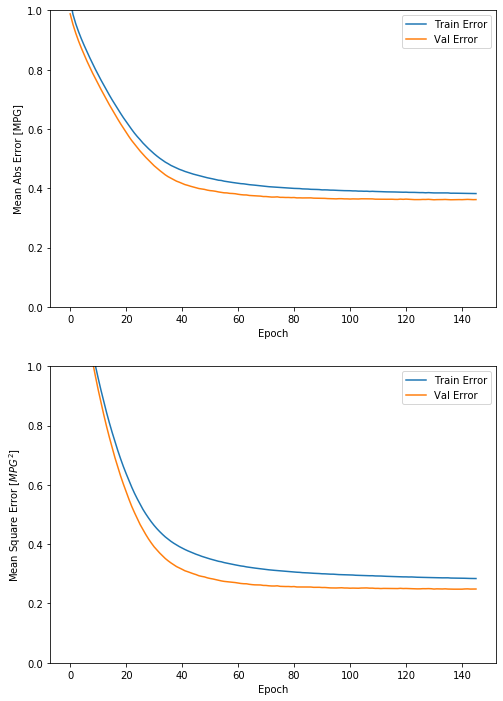

In [53]:
# history Graph를 통해 Model의 activation로 'relu'를 사용하면 dead 뉴런 때문에 Overfitting이 심해지는 것을 확인
# (일반적으로 'relu'를 더 많이 사용하지만 data 수가 너무 적어서 overfitting이 쉽게 나타나는 것으로 추정)
# activation 함수 'elu' 사용

plot_history(history)

In [54]:
loss, mae, mse = model.evaluate(X_train, y_train, verbose=2)

print("Train 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

3167/3167 - 0s - loss: 0.2765 - mae: 0.3782 - mse: 0.2765
Train 세트의 평균 절대 오차:  0.38 MPG


In [55]:
loss, mae, mse = model.evaluate(X_valid, y_valid, verbose=2)

print("Validation 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

792/792 - 0s - loss: 0.2841 - mae: 0.3804 - mse: 0.2841
Validation 세트의 평균 절대 오차:  0.38 MPG


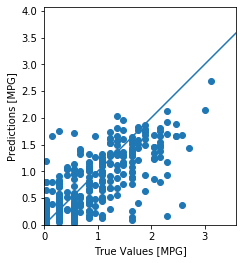

In [56]:
plt.scatter(y_valid, pred_valid)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

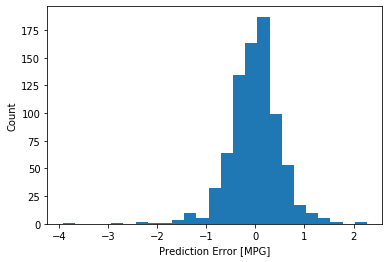

In [57]:
error = pred_valid - y_valid
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [58]:
# pred_test도 Scaling된 값이 나오기 때문에 원래 분포로 돌려줘야만 채점을 받을 수 있음

pred_test = model.predict(test)

In [59]:
pred_test

array([[ 9.00305390e-01],
       [ 7.48188972e-01],
       [ 2.63003856e-01],
       [ 4.70765889e-01],
       [ 3.30426306e-01],
       [-6.23933934e-02],
       [ 5.69973625e-02],
       [ 5.63206732e-01],
       [ 1.01662159e+00],
       [ 1.43444157e+00],
       [ 1.70921409e+00],
       [ 1.26554334e+00],
       [ 1.24895477e+00],
       [ 1.31735778e+00],
       [ 1.48109305e+00],
       [ 1.48051167e+00],
       [ 1.37029541e+00],
       [ 1.18990064e+00],
       [ 9.19137061e-01],
       [ 1.09411001e+00],
       [ 5.62051952e-01],
       [ 7.99825788e-01],
       [ 8.10909212e-01],
       [ 5.40879786e-01],
       [ 6.42684817e-01],
       [ 1.34546745e+00],
       [ 1.68529475e+00],
       [ 1.05940020e+00],
       [ 7.19994068e-01],
       [ 3.90879869e-01],
       [ 5.61522901e-01],
       [ 8.07888091e-01],
       [ 7.82001078e-01],
       [ 7.23523915e-01],
       [ 8.04967105e-01],
       [ 8.67705464e-01],
       [ 4.60527718e-01],
       [ 3.25729221e-01],
       [ 5.8

In [60]:
pred_test *= y_std
pred_test += y_mean

In [61]:
pred_test

array([[192.84787],
       [191.7951 ],
       [188.43724],
       [189.87512],
       [188.90385],
       [186.18524],
       [187.01152],
       [190.5149 ],
       [193.65288],
       [196.54453],
       [198.44617],
       [195.37561],
       [195.2608 ],
       [195.7342 ],
       [196.86739],
       [196.86336],
       [196.10059],
       [194.85211],
       [192.97821],
       [194.18916],
       [190.5069 ],
       [192.15248],
       [192.22919],
       [190.36037],
       [191.06494],
       [195.92874],
       [198.28062],
       [193.94894],
       [191.59998],
       [189.32225],
       [190.50323],
       [192.20828],
       [192.02911],
       [191.6244 ],
       [192.18806],
       [192.62225],
       [189.80426],
       [188.87135],
       [190.68813],
       [192.31291],
       [192.84998],
       [194.47603],
       [190.1019 ],
       [191.59937],
       [192.59329],
       [195.12556],
       [196.4803 ],
       [195.81374],
       [195.93005],
       [194.42334],


In [62]:
sample_submission.shape

(1000, 1)

In [63]:
pred_test.shape

(1000, 1)

In [64]:
sample_submission['Y'] = pred_test

In [65]:
sample_submission


,Y
idx,
1,192.847870
2,191.795105
3,188.437241
4,189.875122
5,188.903854
...,...
996,183.635712
997,183.700104
998,181.489807


In [66]:
sample_submission.to_csv('~/SageMaker/kskc2180033/kskc2180033_submission_DENSE.csv')